In [1]:
# from __future__ import print_function, division

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [55]:
def integrate(y, dx):
    """
    Takes an array of y-values and a step size dx of the corresponding x values 
    and numerically integrates the function, returning the final value
    """
    counter = 0
    for yi in y:
        counter += dx * yi
    return counter

In [56]:
def plot_fn(xarr, yarr, title=''):
    """
    Basic plotting function
    """
    plt.plot(xarr, yarr)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

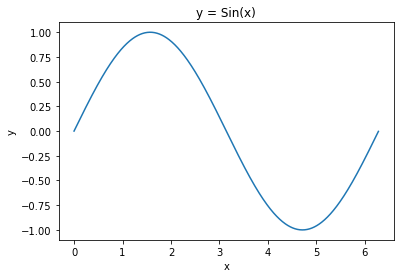

In [57]:
# TODO write code here to setup arrays x and y = sin(x) and then plot themby calling plot_fn
x = np.arange(0,2*np.pi,0.01)
y = np.sin(x)
plot_fn(x,y,title='y = Sin(x)')

In [58]:
'''This gives a result that is very close to zero.
The integrate function essentially computes Riemann sums. 
Thus, as dx gets smaller, the integral will become closer to the actual value.'''

print(integrate(y,1e-100))

-1.0853464615201154e-103


In [59]:
'''This approximates the numerical integral using the Riemann sum 
method of trapezoids. It comes slightly closer to the actual value of zero.'''
print(np.trapz(y, dx = 1e-100))

5.073044349074057e-104


In [84]:
x = np.arange(0,6*np.pi,0.01)
y = np.sin(x)

first_derivative_approx = np.diff(y)
first_derivative_sign = np.sign(first_derivative_approx)
second_derivative_approx = np.diff(first_derivative_sign)

# Make arrays of the local minima/maxima
# Also need to check the endpoints

# This ignored the endpoints
# Local minimum
minimum = (second_derivative_approx > 0).nonzero()[0] + 1

# Local maximum
maximum = (second_derivative_approx < 0).nonzero()[0] + 1


print("The local minima are located at: ")
print x[minimum]
print ("The local minima are: ")
print y[minimum]
print("The local maxima are located at: ")
print x[maximum]
print ("The local maxima are: ")
print y[maximum]


The local minima are located at: 
[ 4.71 11.   17.28]
The local minima are: 
[-0.99999715 -0.99999021 -0.99999923]
The local maxima are located at: 
[ 1.57  7.85 14.14]
The local maxima are: 
[0.99999968 0.99999207 0.99999599]


# Part 2

In [61]:
def wavepacket(x, k, sigma):
    """
    This function creates a wavepacket on the interval defined by x with
    wavevector k and standard deviation sigma.
    """
    return np.sin(k*x) *  np.exp(-(x**2)/(2*sigma**2))

In [62]:
def noisy_packet(x_values, k, sigma, noise_amplitude):
    """
    This function returns a noisy Gaussian wavepacket with wave
    vector k, standard deviation sigma and Gaussian noise of standard
    deviation noise_amplitude.
    """
    clean_y = wavepacket(x_values,k,sigma)
    noisy_y = clean_y + noise_amplitude*np.random.randn(len(x_values))
    return noisy_y

In [70]:
def clean_data(x_values,y_values):
    """
    This function should take a set of y_values, perform the Fourier
    transform on it, filter out the high frequency noise, transform the
    signal back into real space, and return it.
    """

    # TODO edit this function
    y_fft = np.fft.rfft(y_values)
    
    low_pass_filter = np.ones(y_fft.shape) # build low pass filter for Fourier function
    num_freq = y_fft.size # get a cutoff frequency
    low_pass_filter[int(num_freq/25):num_freq] = 0 


    
    y_fourier = np.array(y_fft*low_pass_filter)
    
    # set indices with frequency zero to zero in the fourier transform
    # then inverse fourier transform
    y_clean_values = np.fft.irfft(y_fourier)
    
    return y_clean_values

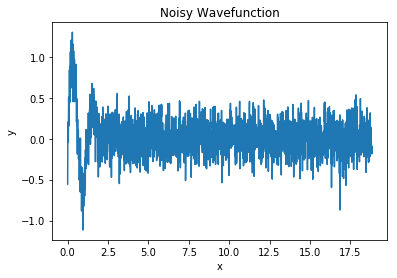

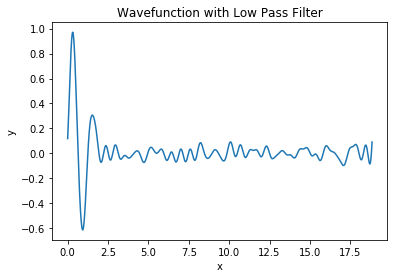

In [71]:
# TODO call noisy_packet() to get a Gaussian wave packet, 
# call clean_data() to apply a low pass filter to the data, and
# finally plot the result using plot_fn
noisy_wave = noisy_packet(x, 5, 1, 0.2)
plot_fn(x,noisy_wave, title='Noisy Wavefunction')

clean_wave = clean_data(x, noisy_wave)
plot_fn(x, clean_wave, title='Wavefunction with Low Pass Filter')

# Part 3

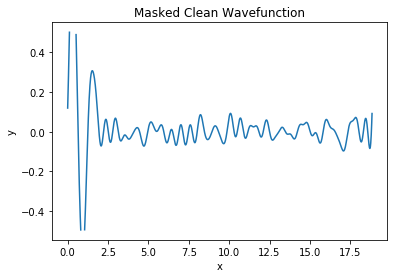

In [80]:
masked_clean_wave=np.ma.masked_where(np.abs(clean_wave)>0.5,clean_wave)
plot_fn(x, masked_clean_wave, title='Masked Clean Wavefunction')

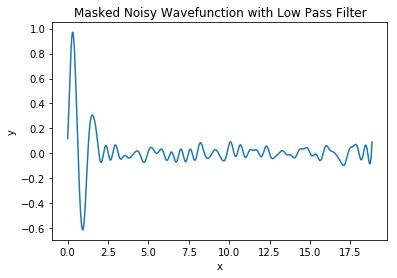

In [82]:
# Generate masked noisy data
masked_noisy_data = np.ma.masked_where(np.abs(noisy_wave)<0.5,noisy_wave)

# Clean masked noisy data
clean_data = clean_data(x, masked_noisy_data)

# Plot data
plot_fn(x, clean_data, title='Masked Noisy Wavefunction with Low Pass Filter')

# This also successfully cleaned the wavepacket, but it did not successfully mask the values that are greater than 0.5.
# I'm not sure, but this could be because the noisy wavepacket has too much noise to mask the data initially.